In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import learning_curve, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR

import math
import datetime

/Users/tailtq/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### --- Steps ---:
1. Check missing values
2. Data visualization (map)
3. Data exploitation
4. Feature scaling
5. Use multiple models (model selection)

### Load dataset

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_master = pd.concat([df, df_test], ignore_index=True)

df_len = len(df)
df_test_len = len(df_test)
ids_test = df_test[['Id']]

df_master.describe(include='all')

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,198,2919.000000,2919,2837,2837,2918.000000,2918.000000,...,2918,2919.000000,2919,2919.000000,2918.000000,2917,2919.000000,2919.000000,2919.000000,2919.000000
unique,NaN,NaN,NaN,2,NaN,5,4,4,NaN,NaN,...,9,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Grvl,NaN,1Fam,TA,No,NaN,NaN,...,WD,NaN,Pave,NaN,NaN,AllPub,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,120,NaN,2425,2606,1904,NaN,NaN,...,2525,NaN,2907,NaN,NaN,2916,NaN,NaN,NaN,NaN
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,NaN,NaN,441.423235,49.582248,...,NaN,16.062350,NaN,6.451524,1051.777587,NaN,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,NaN,NaN,455.610826,169.205611,...,NaN,56.184365,NaN,1.569379,440.766258,NaN,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,0.000000,NaN,2.000000,0.000000,NaN,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,0.000000,NaN,5.000000,793.000000,NaN,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,NaN,3.000000,NaN,NaN,NaN,368.500000,0.000000,...,NaN,0.000000,NaN,6.000000,989.500000,NaN,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,NaN,3.000000,NaN,NaN,NaN,733.000000,0.000000,...,NaN,0.000000,NaN,7.000000,1302.000000,NaN,168.000000,2001.000000,2004.000000,2009.000000


In [3]:
def get_df(data):
    return data.iloc[:df_len]

def get_df_test(data):
    return data.iloc[:df_test_len]

In [4]:
df_master.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

#### Categorical features:
- MSSubClass
- MSZoning
- Street
- Alley
- Utilities
- LotConfig
- Neighborhood
- Condition1
- Condition2
- BldgType
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- Electrical
- Functional
- GarageType
- PavedDrive
- Fence
- MiscFeature
- SaleType
- SaleCondition
- HouseStyle

#### Ordinal features:
- LotShape
- LandContour
- LandSlope
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond
- PoolQC

#### Binary features:
- CentralAir

#### Numerical features:
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold
- SalePrice

### Check missing values

In [6]:
pd.options.display.max_rows = 999
df_master.isnull().sum().loc[lambda x: x != 0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [7]:
df.isnull().sum().loc[lambda x: x != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
data = df_master.copy()

In [9]:
now = datetime.datetime.now().year

data['BsmtQual'] = data['BsmtQual'].fillna('NA')
data['BsmtCond'] = data['BsmtCond'].fillna('NA')
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCond'] = data['GarageQual'].fillna('NA')
data['PoolQC'] = data['PoolQC'].fillna('NA')

data['GarageFinish'] = data['GarageFinish'].fillna('NA')

data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')

# missing value as another feature
data['Alley'] = data['Alley'].fillna('NA') # TODO: Test with dropped alley
data['GarageType'] = data['GarageType'].fillna('NA')
data['Fence'] = data['Fence'].fillna('NA')
data['MiscFeature'] = data['MiscFeature'].fillna('NA')
data['MasVnrType'] = data['MasVnrType'].fillna('NA')

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(now + 1)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [10]:
# drop LotFrontage temporarily to check performance
data = data.drop(['LotFrontage'], axis=1)

missing_values_cols = ['Electrical']

df_len -= df.isna().sum()['Electrical']

for col in missing_values_cols:
    data = data.drop(data[col].isna().loc[lambda x: x == True].index.tolist())

In [11]:
df = get_df(data)
df_test = get_df_test(data)

data = df

### Data visualization

#### Dataset

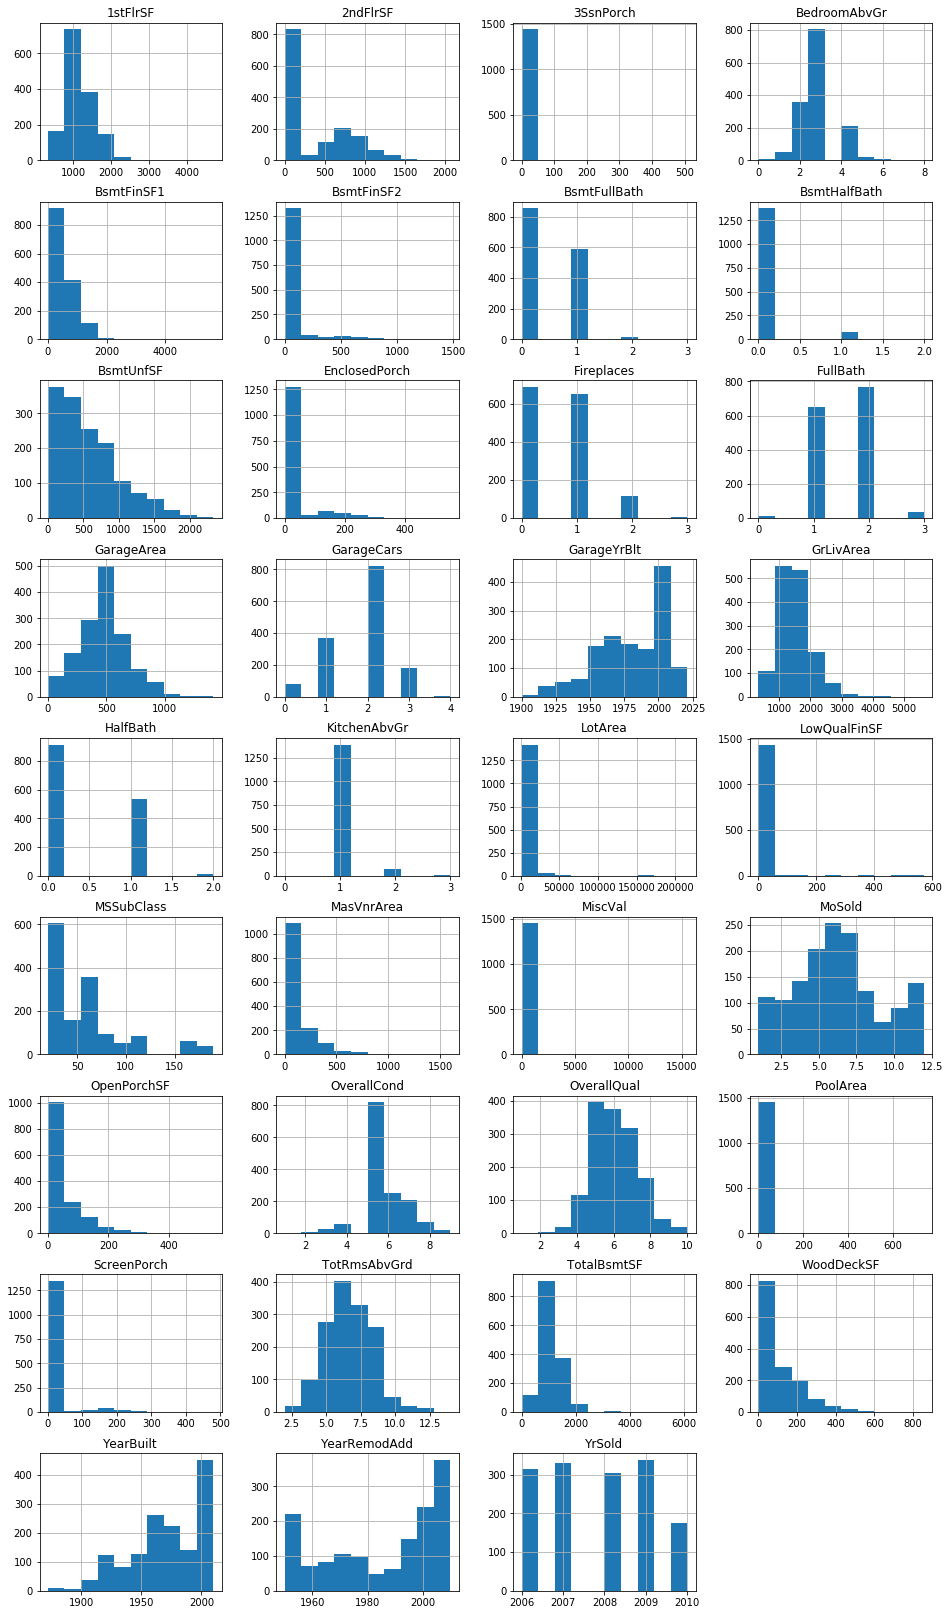

In [12]:
data.drop(['SalePrice', 'Id'], axis=1).hist(figsize=(16, 42), layout=(13, 4));

#### Correlation

In [13]:
def print_corr(data):
    for index, row in data.corr().iterrows():
        for index2, value in row.iteritems():
            if value != 1. and (value >= 0.45 or value <= -0.45):
                print('{} {}: {}'.format(index, index2, value))

In [14]:
print_corr(data.drop(['SalePrice', 'Id'], axis=1))

1stFlrSF GarageArea: 0.4897414342938718
1stFlrSF GrLivArea: 0.5660836985804982
1stFlrSF OverallQual: 0.4759330491701534
1stFlrSF TotalBsmtSF: 0.8193932708606806
2ndFlrSF BedroomAbvGr: 0.5029075703210278
2ndFlrSF GrLivArea: 0.6877263432724873
2ndFlrSF HalfBath: 0.6095513630173593
2ndFlrSF TotRmsAbvGrd: 0.6163999066603997
BedroomAbvGr 2ndFlrSF: 0.5029075703210278
BedroomAbvGr GrLivArea: 0.5213098111787305
BedroomAbvGr TotRmsAbvGrd: 0.6766132635896407
BsmtFinSF1 BsmtFullBath: 0.6490250394569432
BsmtFinSF1 BsmtUnfSF: -0.4957182196250295
BsmtFinSF1 TotalBsmtSF: 0.5219631724888583
BsmtFullBath BsmtFinSF1: 0.6490250394569432
BsmtUnfSF BsmtFinSF1: -0.4957182196250295
Fireplaces GrLivArea: 0.4616800198425712
FullBath GarageCars: 0.4696193325207459
FullBath GrLivArea: 0.6302830835372105
FullBath OverallQual: 0.5512673907413024
FullBath TotRmsAbvGrd: 0.5547589450178887
FullBath YearBuilt: 0.4679603679904262
GarageArea 1stFlrSF: 0.4897414342938718
GarageArea GarageCars: 0.8826130266800475
GarageAr

#### Interaction between features

##### Numeric - Numeric

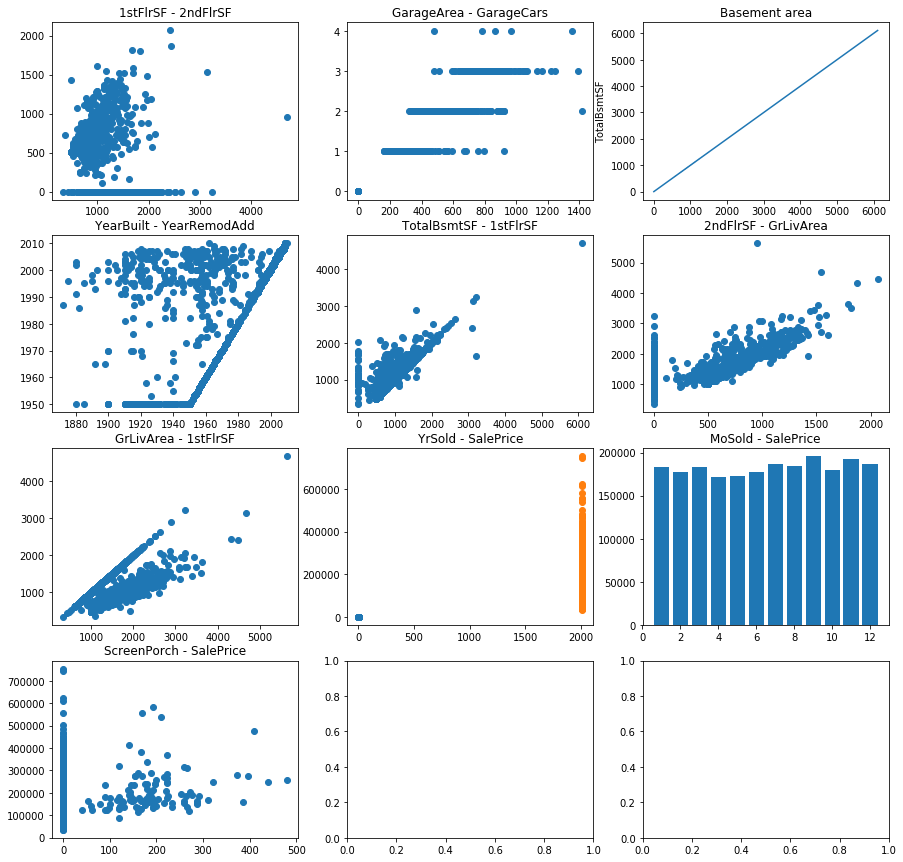

In [15]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

ax[0][0].scatter(data['1stFlrSF'], data['2ndFlrSF'])
ax[0][0].set_title('1stFlrSF - 2ndFlrSF')

ax[0][1].scatter(data['GarageArea'], data['GarageCars'])
ax[0][1].set_title('GarageArea - GarageCars')

sns.lineplot(data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['BsmtUnfSF'], data['TotalBsmtSF'], ax=ax[0][2])
ax[0][2].set_title('Basement area')

ax[1][0].scatter(data['YearBuilt'], data['YearRemodAdd'])
ax[1][0].set_title('YearBuilt - YearRemodAdd')

ax[1][1].scatter(data['TotalBsmtSF'], data['1stFlrSF'])
ax[1][1].set_title('TotalBsmtSF - 1stFlrSF')

# 2ndFlrSF GrLivArea
# GrLivArea 1stFlrSF

ax[1][2].scatter(data['2ndFlrSF'], data['GrLivArea'])
ax[1][2].set_title('2ndFlrSF - GrLivArea')

ax[2][0].scatter(data['GrLivArea'], data['1stFlrSF'])
ax[2][0].set_title('GrLivArea - 1stFlrSF')

ax[2][1].scatter(data['BedroomAbvGr'], data['TotRmsAbvGrd'])
ax[2][1].set_title('BedroomAbvGr - TotRmsAbvGrd')

ax[2][1].scatter(data['YrSold'], data['SalePrice'])
ax[2][1].set_title('YrSold - SalePrice')

ax[2][2].bar(data['MoSold'].value_counts(sort=False).keys().tolist(), data.groupby('MoSold')['SalePrice'].mean().tolist())
ax[2][2].set_title('MoSold - SalePrice')

ax[3][0].scatter(data['ScreenPorch'], data['SalePrice'])
ax[3][0].set_title('ScreenPorch - SalePrice')

plt.show();

In [16]:
df.eq(0).sum().loc[lambda x: x != 0]

2ndFlrSF          829
3SsnPorch        1435
BedroomAbvGr        6
BsmtFinSF1        466
BsmtFinSF2       1292
BsmtFullBath      855
BsmtHalfBath     1377
BsmtUnfSF         118
EnclosedPorch    1251
Fireplaces        689
FullBath            9
GarageArea         81
GarageCars         81
HalfBath          913
KitchenAbvGr        1
LowQualFinSF     1433
MasVnrArea        868
MiscVal          1407
OpenPorchSF       655
PoolArea         1452
ScreenPorch      1343
TotalBsmtSF        37
WoodDeckSF        761
dtype: int64

##### Category - Numeric

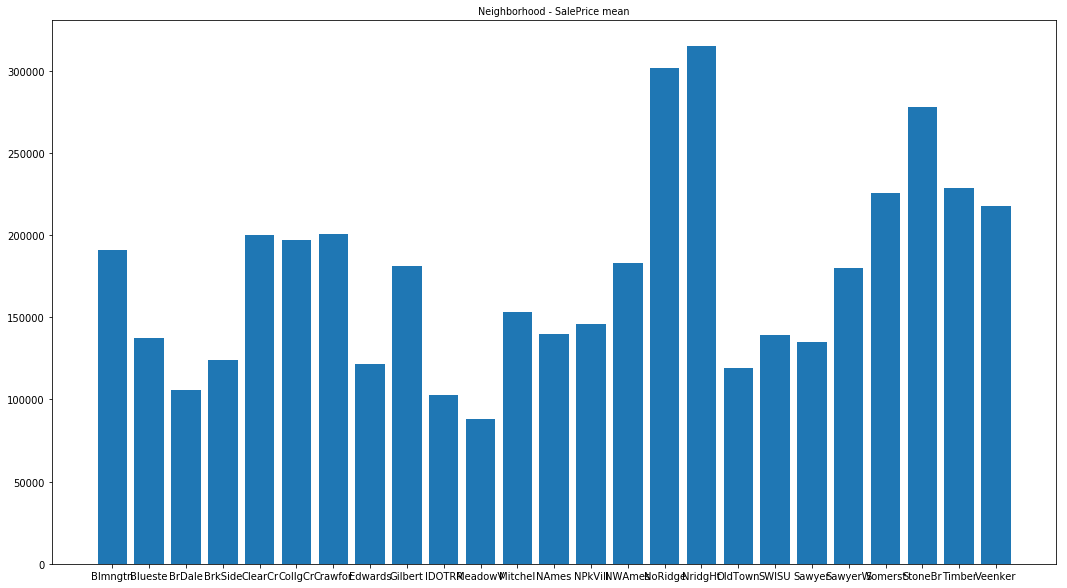

In [17]:
df_neighborhood = pd.DataFrame(data.groupby('Neighborhood')['SalePrice'].median()).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(18, 10))

plt.rcParams.update({'font.size': 8})
ax.bar(df_neighborhood['Neighborhood'], df_neighborhood['SalePrice'])
ax.set_title('Neighborhood - SalePrice mean')

plt.show();

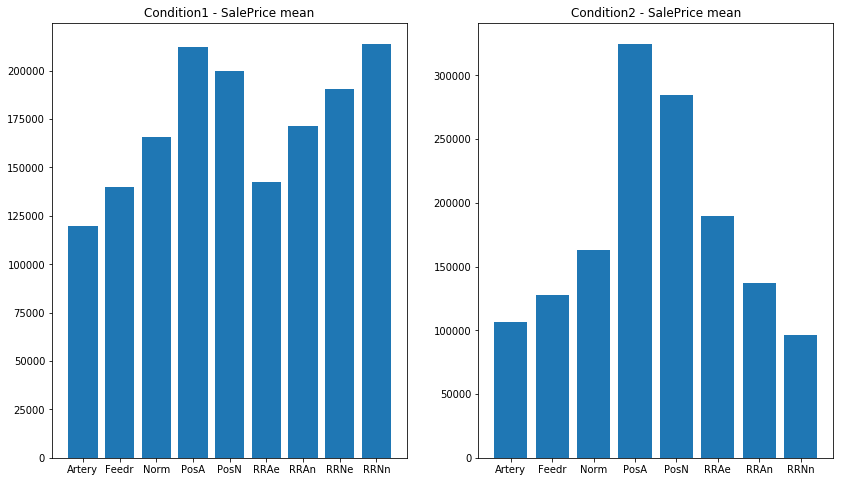

In [18]:
df_condition1 = pd.DataFrame(data.groupby('Condition1')['SalePrice'].median()).reset_index()
df_condition2 = pd.DataFrame(data.groupby('Condition2')['SalePrice'].median()).reset_index()

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

ax[0].bar(df_condition1['Condition1'], df_condition1['SalePrice'])
ax[0].set_title('Condition1 - SalePrice mean')

ax[1].bar(df_condition2['Condition2'], df_condition2['SalePrice'])
ax[1].set_title('Condition2 - SalePrice mean')

plt.show();

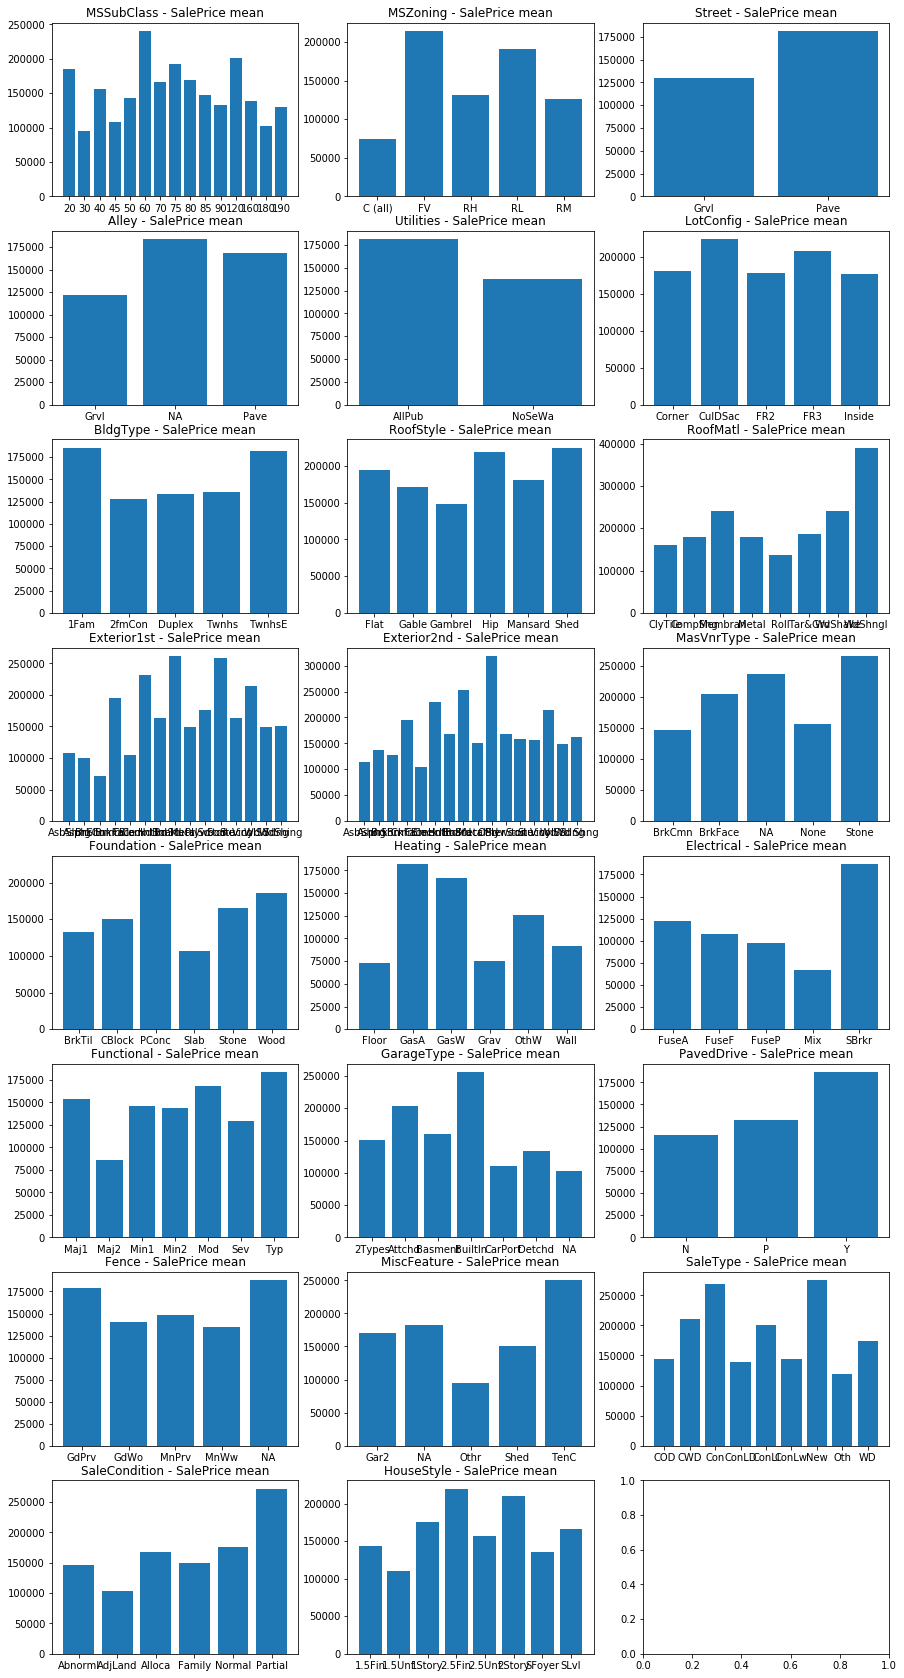

In [19]:
fig, ax = plt.subplots(8, 3, figsize=(15, 30))

plotting_df = pd.DataFrame(data.groupby('MSSubClass')['SalePrice'].mean()).reset_index()
ax[0][0].bar(plotting_df['MSSubClass'].astype(str), plotting_df['SalePrice'])
ax[0][0].set_title('MSSubClass - SalePrice mean')

# Can separate into 3-4 segmentations (high, medium, low class)
plotting_df = pd.DataFrame(data.groupby('MSZoning')['SalePrice'].mean()).reset_index()
ax[0][1].bar(plotting_df['MSZoning'], plotting_df['SalePrice'])
ax[0][1].set_title('MSZoning - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Street')['SalePrice'].mean()).reset_index()
ax[0][2].bar(plotting_df['Street'], plotting_df['SalePrice'])
ax[0][2].set_title('Street - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Alley')['SalePrice'].mean()).reset_index()
ax[1][0].bar(plotting_df['Alley'], plotting_df['SalePrice'])
ax[1][0].set_title('Alley - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Utilities')['SalePrice'].mean()).reset_index()
ax[1][1].bar(plotting_df['Utilities'], plotting_df['SalePrice'])
ax[1][1].set_title('Utilities - SalePrice mean')

# 2 segmentations
plotting_df = pd.DataFrame(data.groupby('LotConfig')['SalePrice'].mean()).reset_index()
ax[1][2].bar(plotting_df['LotConfig'], plotting_df['SalePrice'])
ax[1][2].set_title('LotConfig - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('BldgType')['SalePrice'].mean()).reset_index()
ax[2][0].bar(plotting_df['BldgType'], plotting_df['SalePrice'])
ax[2][0].set_title('BldgType - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('RoofStyle')['SalePrice'].mean()).reset_index()
ax[2][1].bar(plotting_df['RoofStyle'], plotting_df['SalePrice'])
ax[2][1].set_title('RoofStyle - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('RoofMatl')['SalePrice'].mean()).reset_index()
ax[2][2].bar(plotting_df['RoofMatl'], plotting_df['SalePrice'])
ax[2][2].set_title('RoofMatl - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Exterior1st')['SalePrice'].mean()).reset_index()
ax[3][0].bar(plotting_df['Exterior1st'], plotting_df['SalePrice'])
ax[3][0].set_title('Exterior1st - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Exterior2nd')['SalePrice'].mean()).reset_index()
ax[3][1].bar(plotting_df['Exterior2nd'], plotting_df['SalePrice'])
ax[3][1].set_title('Exterior2nd - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('MasVnrType')['SalePrice'].mean()).reset_index()
ax[3][2].bar(plotting_df['MasVnrType'], plotting_df['SalePrice'])
ax[3][2].set_title('MasVnrType - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Foundation')['SalePrice'].mean()).reset_index()
ax[4][0].bar(plotting_df['Foundation'], plotting_df['SalePrice'])
ax[4][0].set_title('Foundation - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Heating')['SalePrice'].mean()).reset_index()
ax[4][1].bar(plotting_df['Heating'], plotting_df['SalePrice'])
ax[4][1].set_title('Heating - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Electrical')['SalePrice'].mean()).reset_index()
ax[4][2].bar(plotting_df['Electrical'], plotting_df['SalePrice'])
ax[4][2].set_title('Electrical - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Functional')['SalePrice'].mean()).reset_index()
ax[5][0].bar(plotting_df['Functional'], plotting_df['SalePrice'])
ax[5][0].set_title('Functional - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('GarageType')['SalePrice'].mean()).reset_index()
ax[5][1].bar(plotting_df['GarageType'], plotting_df['SalePrice'])
ax[5][1].set_title('GarageType - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('PavedDrive')['SalePrice'].mean()).reset_index()
ax[5][2].bar(plotting_df['PavedDrive'], plotting_df['SalePrice'])
ax[5][2].set_title('PavedDrive - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('Fence')['SalePrice'].mean()).reset_index()
ax[6][0].bar(plotting_df['Fence'], plotting_df['SalePrice'])
ax[6][0].set_title('Fence - SalePrice mean')


plotting_df = pd.DataFrame(data.groupby('MiscFeature')['SalePrice'].mean()).reset_index()
ax[6][1].bar(plotting_df['MiscFeature'], plotting_df['SalePrice'])
ax[6][1].set_title('MiscFeature - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('SaleType')['SalePrice'].mean()).reset_index()
ax[6][2].bar(plotting_df['SaleType'], plotting_df['SalePrice'])
ax[6][2].set_title('SaleType - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('SaleCondition')['SalePrice'].mean()).reset_index()
ax[7][0].bar(plotting_df['SaleCondition'], plotting_df['SalePrice'])
ax[7][0].set_title('SaleCondition - SalePrice mean')

plotting_df = pd.DataFrame(data.groupby('HouseStyle')['SalePrice'].mean()).reset_index()
ax[7][1].bar(plotting_df['HouseStyle'], plotting_df['SalePrice'])
ax[7][1].set_title('HouseStyle - SalePrice mean')

plt.show();

### Feature engineering

In [20]:
data = pd.concat([df, df_test], ignore_index=True)

In [21]:
quality_mappings = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
}
bsmtFinType_mappings = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NA': 0,
}
yn_mappings = {
    'Y': 1,
    'P': 0.5,
    'N': 0,
}

data['BsmtQual'] = data['BsmtQual'].map(quality_mappings)
data['BsmtCond'] = data['BsmtCond'].map(quality_mappings)
data['FireplaceQu'] = data['FireplaceQu'].map(quality_mappings)
data['GarageQual'] = data['GarageQual'].map(quality_mappings)
data['GarageCond'] = data['GarageCond'].map(quality_mappings)
data['KitchenQual'] = data['KitchenQual'].map(quality_mappings)
data['ExterQual'] = data['ExterQual'].map(quality_mappings)
data['ExterCond'] = data['ExterCond'].map(quality_mappings)
data['PoolQC'] = data['PoolQC'].map(quality_mappings)
data['HeatingQC'] = data['HeatingQC'].map(quality_mappings)

data['PavedDrive'] = data['PavedDrive'].map(yn_mappings)
data['CentralAir'] = data['CentralAir'].map(yn_mappings)

data['GarageFinish'] = data['GarageFinish'].map({
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'NA': 0,
})

data['LandSlope'] = data['LandSlope'].map({
    'Gtl': 1,
    'Mod': 2,
    'Sev': 3,
})

data['BsmtExposure'] = data['BsmtExposure'].map({
    'Gd': 3,
    'Av': 2,
    'Mn': 1,
    'No': 0,
    'NA': -1,
})
data['BsmtFinType1'] = data['BsmtFinType1'].map(bsmtFinType_mappings)
data['BsmtFinType2'] = data['BsmtFinType2'].map(bsmtFinType_mappings)
data['IsRemodel'] = (data['YearRemodAdd'] == data['YearBuilt']).astype(int)
data['InAlley'] = (data['Alley'] != 'NA').astype(int)
data['HalfBath'] += data['BsmtHalfBath']
data['FullBath'] += data['BsmtFullBath']
data['BsmtFinSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
data['FlrsSF'] = data['1stFlrSF'] + data['2ndFlrSF']
data['MSSubClass'] = data['MSSubClass'].astype(str)

data['MSZoning'] = data['MSZoning'].map({
    'C (all)': 1,
    'RH': 2,
    'RM': 2,
    'FV': 3,
    'RL': 3,
})

dropped_columns = [
    ### Temporarily drop because houses which don't have miscellaneous feature + pool are too much
    'MiscFeature',
    'MiscVal',
    'PoolQC',
    'PoolArea',
    'ScreenPorch',
    '3SsnPorch',
    'Fence',
    #--
    'Id',
    'OverallQual',
    'OverallCond',
    'YrSold',
    'MoSold',
    'EnclosedPorch',
    '1stFlrSF',
    '2ndFlrSF',
    'BsmtFinSF1',
    'BsmtFinSF2',
    ### BsmtFinType1 BsmtFinSF: 0.6774477426863272
    'BsmtFinType1',
    #--
#     'BsmtFinType2',
    'KitchenQual',
    'Utilities',
    'Heating',
#     'MSZoning',
#     'BsmtFinSF',
    'TotalBsmtSF',
    ### not sure to drop
    'BsmtHalfBath',
    'BsmtFullBath',
    'YearRemodAdd',
    'GarageYrBlt',
#     'LowQualFinSF',
#     'MSSubClass',
    #--
    ### Can replace GarageArea to measure performance
    'GarageArea',
    #--
    ### Can replace TotRmsAbvGrd to measure performance
    'BedroomAbvGr',
    #--
    ### TotalBsmtSF 1stFlrSF: 0.8181066834217854 --> most of houses' basements are first floor --> feature first floor above ground
    ### GrLivArea 2ndFlrSF: 0.6904032079188407
    ### GrLivArea 1stFlrSF: 0.5658949963026086
    'GrLivArea',
    #--
    ### BsmtCond BsmtQual: 0.633743176840666
    'BsmtQual',
    #--
    ### TotRmsAbvGrd FlrsSF: 0.820171570929249
    'TotRmsAbvGrd',
    #--
    ### Fireplaces FireplaceQu: 0.863152236826059
    'FireplaceQu',
    #--
    ### BsmtUnfSF BsmtFinSF: -0.5458809531074167
    'BsmtUnfSF',
    #--
    ### ExterQual YearBuilt: 0.5990735386651546
    'YearBuilt',
    #--
    'GarageCond',
    'GarageFinish',
    'GarageQual',
]
data = data.drop(dropped_columns, axis=1)

In [22]:
print_corr(get_df(data).drop(['SalePrice'], axis=1))

ExterQual FullBath: 0.45257277424100867
ExterQual GarageCars: 0.5266408894239388
ExterQual HeatingQC: 0.5200439440641895
Fireplaces FlrsSF: 0.4674960951002199
FullBath ExterQual: 0.45257277424100867
FullBath BsmtFinSF: 0.5018737778356541
FullBath FlrsSF: 0.506131196575234
GarageCars ExterQual: 0.5266408894239388
GarageCars FlrsSF: 0.48000385924463723
HeatingQC ExterQual: 0.5200439440641895
BsmtFinSF FullBath: 0.5018737778356541
FlrsSF Fireplaces: 0.4674960951002199
FlrsSF FullBath: 0.506131196575234
FlrsSF GarageCars: 0.48000385924463723


### Split data

In [23]:
data_with_dummies = pd.get_dummies(data)

df = get_df(data_with_dummies)
df_test = get_df_test(data_with_dummies)

data_with_dummies = df

In [24]:
X = data_with_dummies.drop('SalePrice', axis=1)
y = data_with_dummies['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model selection

In [25]:
model1 = DecisionTreeRegressor(random_state=0)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)
# DecisionTreeRegressor
# RandomForestRegressor
# LinearRegression

0.7006509581399016

In [26]:
model2 = RandomForestRegressor(n_estimators=400, random_state=0)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8735384040434159

In [27]:
# print(cross_val_score(model2, X, y, cv=7))

In [28]:
importances = pd.DataFrame({ 'columns': X_train.columns.values,
                            'percent': model2.feature_importances_ * 100 }) 
importances.sort_values('percent', ascending=False)

,columns,percent
8,GarageCars,33.570686
23,FlrsSF,23.286356
5,ExterQual,16.342546
22,BsmtFinSF,6.707784
13,LotArea,2.245738
16,MasVnrArea,2.123483
7,FullBath,0.967250
17,OpenPorchSF,0.930228
19,WoodDeckSF,0.910545
99,GarageType_Attchd,0.886195


In [29]:
ids_test['SalePrice'] = model2.predict(df_test.drop('SalePrice', axis=1))
ids_test.to_csv(path_or_buf='result.csv', index=False)

In [30]:
# Check overfitting
# Improve features